In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [4]:
df = pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [9]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df.drop(columns=['Cabin'], inplace=True, errors='ignore')

In [10]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [11]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical = ['Age', 'Fare']
df[numerical] = scaler.fit_transform(df[numerical])

In [13]:
df[numerical].describe()

,Age,Fare
count,8.910000e+02,8.910000e+02
mean,2.272780e-16,3.987333e-18
std,1.000562e+00,1.000562e+00
min,-2.224156e+00,-6.484217e-01
25%,-5.657365e-01,-4.891482e-01
50%,-1.046374e-01,-3.573909e-01
75%,4.333115e-01,-2.424635e-02
max,3.891554e+00,9.667167e+00


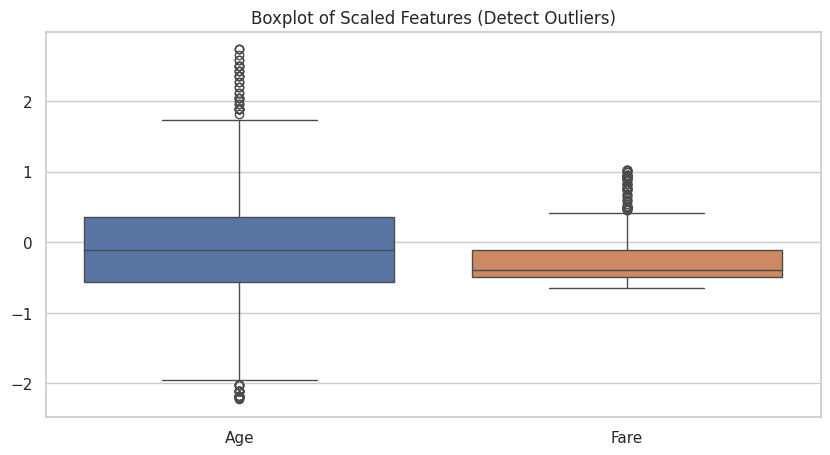

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplot of Scaled Features (Detect Outliers)")
plt.show()

In [21]:
#Removin the Outliers
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(df[['Age', 'Fare']]))
df = df[(z < 3).all(axis=1)]

In [18]:
df_original = df.copy()

from scipy import stats
z = np.abs(stats.zscore(df[['Age', 'Fare']]))
df = df[(z < 3).all(axis=1)]

print("Original rows:", df_original.shape[0])
print("After outlier removal:", df.shape[0])
print("Rows removed:", df_original.shape[0] - df.shape[0])

Original rows: 829
After outlier removal: 817
Rows removed: 12


In [19]:
removed_rows = df_original[~df_original.index.isin(df.index)]

removed_rows

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
33,0,2,2.815657,0,0,-0.437007,True,False,True
224,1,1,0.663861,1,0,1.163700,True,False,True
245,0,1,1.124960,2,0,1.163700,True,True,False
257,1,1,0.049062,0,0,1.093229,False,False,True
291,1,1,-0.796286,1,0,1.185430,False,False,False
412,1,1,0.279612,1,0,1.163700,False,True,False
453,1,1,1.509209,1,0,1.145664,True,False,False
484,1,1,-0.335187,1,0,1.185430,True,False,False
486,1,1,0.433312,1,0,1.163700,False,False,True
504,1,1,-1.026836,0,0,1.093229,False,False,True
